In [2]:
#!pip install spacy

In [4]:
#!pip install sklearn

In [6]:
#!pip install langdetect

In [8]:
#!pip install textblob

In [10]:
#!pip install autocorrect

In [12]:
#!pip install nltk

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import numpy as np
import scipy as sp
from spacy import displacy
import sys
#import pycountry
from langdetect import detect

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
from autocorrect import spell

import nltk
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from autocorrect import spell

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
df=pd.read_csv("turkish_movie_sentiment_dataset.csv")

In [15]:
df.head()

,comment,film_name,point
0,\n Jean Reno denince zate...,Sevginin Gücü,"5,0"
1,\n Ekşın falan izlemek is...,Sevginin Gücü,"5,0"
2,\n Bu yapım hakkında öyle...,Sevginin Gücü,"5,0"
3,\n finali yeter... (sting...,Sevginin Gücü,"5,0"
4,\n Jean Reno..\r\nbu adam...,Sevginin Gücü,"5,0"


In [16]:
df.tail()

,comment,film_name,point
83222,"\n Böyle bi kadrodan, bçy...",Kabus,"2,5"
83223,\n yani bu kaar ii oyunca...,Kabus,"2,5"
83224,\n bugün dvd'sini alıp iz...,Kabus,"1,0"
83225,\n Klasik korku ve gerili...,Kabus,"4,0"
83226,\n Bence gereğinden fazla...,Bir Zamanlar... Hollywood'da,"4,6"


In [17]:
df.sample(10)

,comment,film_name,point
59346,\n komedi-aksiyon türünü ...,Bela İşbaşında,"3,5"
31658,\n eski bir film olmasına...,Kod Adı Kılıçbalığı,"5,0"
19695,\n coenlerin bu filmdeki ...,Büyük Lebowski,"2,5"
51093,\n Bir filmin sürekli aks...,Karanlık Sular,"2,0"
15092,\n Bu kadar saçma bir fil...,Sıcak Kalpler,"1,5"
82307,\n Hayatımda izlediğim en...,Kapalak Kızı,"2,5"
5630,\n yeni bir ölü ozanlar d...,İmparatorlar Kulübü,"2,5"
28285,\n Genelde bu tür animasy...,Çılgın Dostlar,"3,5"
72244,\n isler güçler tarai bi...,Deli Aşk,"5,0"
62650,\n Vasatın biraz üstünde ...,Dehşet Odası,"1,0"


In [18]:
df.shape

(83227, 3)

In [22]:
df.describe()

,comment,film_name,point
count,83227,83227,83227
unique,82456,7722,16
top,\n \n,Kapan,"4,0"
freq,300,92,19958


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83227 entries, 0 to 83226
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    83227 non-null  object
 1   film_name  83227 non-null  object
 2   point      83227 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [24]:
df.isnull().sum()

comment      0
film_name    0
point        0
dtype: int64

In [25]:
df["film_name"].value_counts()

Kapan                            92
Köstebek                         76
Cinnet                           64
Deney                            61
Şüphe                            54
                                 ..
Drakula: Ölü ve Mutlu             1
Karlar Kraliçesi 2                1
Kursk                             1
Gassal                            1
Max Maceraları: Kralın Doğuşu     1
Name: film_name, Length: 7722, dtype: int64

In [26]:
df["point"].value_counts()

4,0    19958
5,0    15873
2,5    11433
3,5     8565
4,5     6983
3,0     5499
0,5     5150
1,0     4917
2,0     2433
1,5     1464
4,6      522
3,9      211
3,8      100
3,7       55
3,2       38
3,1       26
Name: point, dtype: int64

<AxesSubplot:xlabel='point', ylabel='count'>

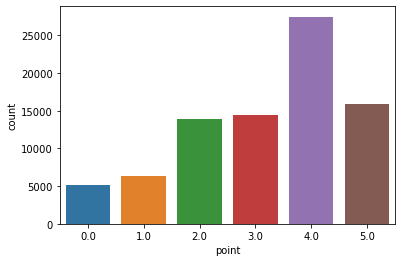

In [35]:
sns.countplot(x=df['point']) 

<AxesSubplot:>

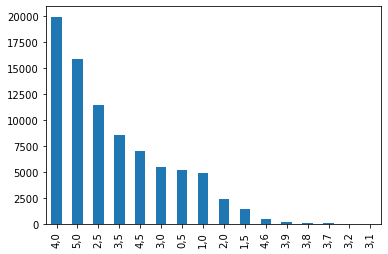

In [27]:
df.point.value_counts().plot.bar()

In [28]:
floatize = lambda x : float(x[0:-2])

df["point"] = df["point"].apply(floatize)
df["point"].value_counts()

4.0    27463
5.0    15873
3.0    14494
2.0    13866
1.0     6381
0.0     5150
Name: point, dtype: int64

In [29]:
df.loc[df['point']==3, 'sentiment']= 'nötr'
df.loc[df['point']<3, 'sentiment']= 'negatif'
df.loc[df['point']>3, 'sentiment']= 'pozitif'
df=df[["point", "sentiment", "comment"]]
df.head()

,point,sentiment,comment
0,5.0,pozitif,\n Jean Reno denince zate...
1,5.0,pozitif,\n Ekşın falan izlemek is...
2,5.0,pozitif,\n Bu yapım hakkında öyle...
3,5.0,pozitif,\n finali yeter... (sting...
4,5.0,pozitif,\n Jean Reno..\r\nbu adam...


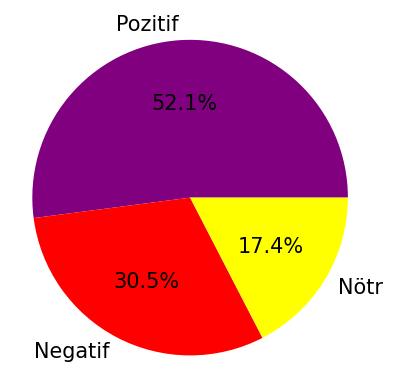

In [30]:
pie_sentiment=df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(3,3), dpi=150),
labels='Pozitif', 'Negatif', 'Nötr'
colors=['purple', 'red', 'yellow']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal');

<AxesSubplot:xlabel='sentiment', ylabel='count'>

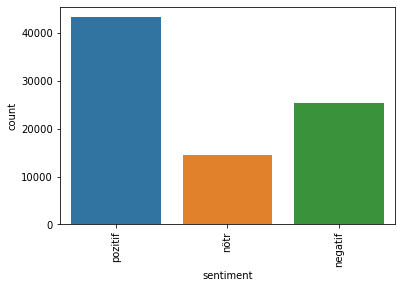

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
sns.countplot(x = df['sentiment'])

In [32]:
df.sentiment.value_counts()

pozitif    43336
negatif    25397
nötr       14494
Name: sentiment, dtype: int64

In [33]:
df.sentiment.value_counts(normalize=True)

pozitif    0.520696
negatif    0.305153
nötr       0.174150
Name: sentiment, dtype: float64

In [34]:
df[['polarity', 'subjectivity']]= df['comment'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [36]:
df.sample(5)

,point,sentiment,comment,polarity,subjectivity
57420,3.0,nötr,"\n Film oldukça iyi, görs...",0.00,0.0
76234,0.0,negatif,\n hayatımda seyrettiğim ...,0.00,0.0
29033,4.0,pozitif,\n Japonların uzman olduk...,0.50,1.0
41273,5.0,pozitif,\n fılmı ılk defa burada ...,0.00,0.0
21467,0.0,negatif,\n arkadaşlar bence filmi...,0.35,0.6


In [37]:
df['comment']=df['comment'].str.lower()                 #bütün sütunu küçük harfe çevirir
df['comment']=df['comment'].str.replace('[^\w\s]','')   #noktalama işaretlerini kaldırır
df['comment']=df['comment'].str.replace('[\d+]','')     #rakamları kaldırır
df['comment']=df['comment'].str.replace('[\n]','')      #yeni satırları kaldırır
df['comment']=df['comment'].str.replace('[\r]','')      # enter kaldırı

In [38]:
df.sample(5)

,point,sentiment,comment,polarity,subjectivity
31553,5.0,pozitif,chaplinin en iyi filmi ...,0.0,0.0
65902,3.0,nötr,beklentimin baya altında...,0.0,0.0
75218,2.0,negatif,film çok vasattı ayrıca ...,0.0,0.0
69623,1.0,negatif,aslında kötü fragmanına...,0.0,0.0
66659,3.0,nötr,film kesinlikle bazı erk...,0.0,0.0


In [39]:
def create_wordcloud(comment):
    mask = np.array(Image.open("images.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=50000,
                  stopwords=stopwords)
    wc.generate(str(comment))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


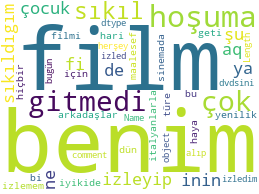

In [40]:
comment1=df[df["point"]==1.0]
create_wordcloud(comment1.comment)

Word Cloud Saved Successfully


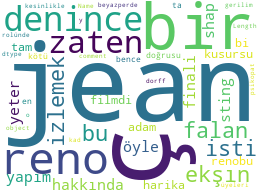

In [41]:
comment5=df[df["point"]==5.0]
create_wordcloud(comment5.comment)

In [42]:
df["comment"][522]    #522. yorum


'                      bu filmin izmirde şehrin en uzak noktalarında ve sadece  salonda gösteriliyo olması çok yazık  birbirine yakın birçok salonda neredeyse aynı filmler gösterililirken bu filme birkaç seans bile ayrılmamış umarım bu hatalarını kısa sürede görürler                    '

In [43]:
df["point"][522]     #522.yoruma verilen puan

4.0

In [44]:
df

,point,sentiment,comment,polarity,subjectivity
0,5.0,pozitif,jean reno denince zaten ...,0.5,1.0
1,5.0,pozitif,ekşın falan izlemek isti...,0.0,0.0
2,5.0,pozitif,bu yapım hakkında öyle ç...,0.0,0.0
3,5.0,pozitif,finali yeter sting shap...,0.0,0.0
4,5.0,pozitif,jean renobu adam kusursu...,0.0,0.0
...,...,...,...,...,...
83222,2.0,negatif,böyle bi kadrodan bçyle ...,0.0,0.0
83223,2.0,negatif,yani bu kaar ii oyuncalr...,0.0,0.0
83224,1.0,negatif,bugün dvdsini alıp izled...,0.0,0.0
83225,4.0,pozitif,klasik korku ve gerilim ...,0.0,0.0


In [45]:
df.point=df.point.astype("category")


In [47]:
x=df['comment']
y=df['point']

In [48]:
vect=CountVectorizer()

In [49]:
x=vect.fit_transform(x)

In [50]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=.20)

In [51]:
x.shape, y.shape

((83227, 318584), (83227,))

In [52]:
l=LogisticRegression()

In [53]:
l.fit(x_train,y_train) 

LogisticRegression()

In [54]:
pred=l.predict(x_test)

In [55]:
accuracy_score(pred,y_test)  

0.4014177580199447

In [56]:
m=MultinomialNB()

In [57]:
pred2=m.fit(x_train,y_train).predict(x_test) 

In [58]:
accuracy_score(pred2,y_test)

0.3933077015499219